In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_sep_vmax import *

In [4]:
import run_sensitivity

/fast_data/Osnat/RECYCLE_MODEL/recycle_model/run_sensitivity.py:230: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if id is '0':


In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [DONCOLOR, RDONCOLOR, DINCOLOR,SPCOLOR, SHCOLOR,PCOLOR, HCOLOR, ]
ccnorder = ['DON', 'RDON', 'DIN', 'Sp', 'Sh', 'Bp', 'Bh', ]
cccpalette = [ SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC', 'Bp[C]', 'Bh[C]', ]
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPyt

In [6]:
refdf = pd.read_csv('prelim_bottle.csv')


In [7]:
dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
dpath = r'/home/oweissberg/work/RECYCLE_MODEL/results/'
import glob

res_glob_pattern = '*_df.csv.gz'
sum_glob_pattern = '*_sum.csv.gz'

sum_df = pd.concat ( [ 
    pd.read_csv(f, low_memory=False) for f in glob.glob(os.path.join(dpath,sum_glob_pattern ))
] )
df = pd.concat ( [ 
    pd.read_csv(f, low_memory=False) for f in glob.glob(os.path.join(dpath,res_glob_pattern ))
] )



In [8]:
sum_df['type'] = sum_df.run_id.str.replace('_.*','', regex=True)

In [9]:
sum_df.shape

In [10]:
sum_df.nsmallest(columns='error', n=10)

Unnamed: 0       M_h       M_p  gamma^D_p  gamma^D_h    R_p    R_h  \
162           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
606           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
11            0  0.000001  0.000001        0.8        0.8  6.625  6.625   
266           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
675           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
847           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
947           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
329           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
554           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
3             0  0.000001  0.000001        0.8        0.8  6.625  6.625   

        E^O_p  E^I_p  E^O_h  ...   b_p   b_h  \
162  0.000001    0.0    0.0  ...  0.01  0.01   
606  0.000001    0.0    0.0  ...  0.01  0.01   
11   0.000001    0.0    0.0  ...  0.01  0.01   
266  0.000001    0.0    0.0  ...  0.01  0.01   
675  0.000001    0.0    0.0  ...  0.01  0.01   
847  0.000001    0.0    0.0  ...  0.01  0.01   
947  0.000001    0.0    0.0  ...  0.01  0.01   
329  0.000001    0.0    0.0  ...  0.01  0.01   
554  0.000001    0.0    0.0  ...  0.01  0.01   
3    0.000002    0.0    0.0  ...  0.01  0.01   

                                     run_id  status       h_err       p_err  \
162    pse5_K^OC_h_28_h-1985753059580334233       0  259.533774  234.958305   
606     pse5_K^OC_h_29_h8188092764134288882       0  277.389344  222.024215   
11      pse5_K^OC_h_27_h2405127859902017918       0  262.919444  238.854401   
266    pse5_K^OC_h_26_h-3892454154017835166       0  275.394490  248.031736   
675     pse5_K^OC_h_25_h5733440704788533636       0  290.957444  249.357627   
847  pse5_Vmax^IC_p_14_h1437396727630778548       0  304.844079  249.492439   
947     pse5_K^OC_h_24_h4018250409848598934       0  307.824593  249.690006   
329       pse5_K^OC_h_23_h17411770281503720       0  324.948197  248.565058   
554        pse5_O_p_18_h6277377990722857994       0  329.869625  247.391329   
3        pse5_E^O_p_6_h-2557729636135590246       0  291.755201  288.108303   

          error  logerror  message  type  
162  494.492079  6.203531      NaN  pse5  
606  499.413559  6.213435      NaN  pse5  
11   501.773845  6.218150      NaN  pse5  
266  523.426226  6.260396      NaN  pse5  
675  540.315071  6.292152      NaN  pse5  
847  554.336518  6.317772      NaN  pse5  
947  557.514599  6.323489      NaN  pse5  
329  573.513255  6.351781      NaN  pse5  
554  577.260954  6.358294      NaN  pse5  
3    579.863505  6.362793      NaN  pse5  

[10 rows x 52 columns]

In [11]:
df.head()

Unnamed: 0         Bp         Bh        DON      RDON         DIN  \
0           0   1.100000  44.000000  20.000000  0.000000  100.000000   
1           1   2.606905  40.845128   0.067099  1.699377  119.881490   
2           2  10.842238  23.018451   0.150207  3.829530  127.259574   
3           3  27.740282  23.663551   0.448722  5.486430  107.761015   
4           4  61.084571  25.858402   2.747163  8.092578   67.317285   

          DOC       RDOC          DIC        ROS  ...  Treleasep  Tbreakdownh  \
0  132.500000   0.000000  3000.000000   0.000000  ...   0.000004     0.000000   
1    0.089231  11.258375  3039.549191   0.021642  ...   0.000008     0.000008   
2    0.722334  25.370638  2993.783387   0.296117  ...   0.000035     0.000031   
3   29.196912  36.347602  2939.619800   2.732615  ...   0.000089     0.000054   
4  191.495358  53.613329  2851.435558  15.651949  ...   0.000195     0.000064   

   respirationp  respirationh    dic_uptake       Bp[C]       Bh[C]  \
0      0.000002      0.000094 -1.040834e-16    7.287500  291.500000   
1      0.000006      0.000086 -7.580262e-04   17.270745  270.598975   
2      0.000024      0.000049  1.191517e-04   71.829825  152.497235   
3      0.000060      0.000050  1.157287e-03  183.779367  156.771024   
4      0.000132      0.000055  2.847485e-03  404.685283  171.311915   

          Sp[C]         Sh[C]                                run_id  
0  0.000000e+00  0.000000e+00  pse4_epsilon_8_h-1349854120224453962  
1  1.915195e-10  6.157405e-10  pse4_epsilon_8_h-1349854120224453962  
2  1.240144e-09  1.286496e-09  pse4_epsilon_8_h-1349854120224453962  
3  3.436619e-09  1.635627e-09  pse4_epsilon_8_h-1349854120224453962  
4  8.416035e-09  1.994207e-09  pse4_epsilon_8_h-1349854120224453962  

[5 rows x 54 columns]

In [12]:
df.columns

Index(['Unnamed: 0', 'Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',
       'ROS', 'Sp', 'Sh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp',
       'limOCp', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'exudationOp', 'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep',
       'Tbreakdownh', 'respirationp', 'respirationh', 'dic_uptake', 'Bp[C]',
       'Bh[C]', 'Sp[C]', 'Sh[C]', 'run_id'],
      dtype='object')

In [13]:
mdf = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccxorder+ccnorder+cccorder)

In [14]:
neg_ids = mdf.loc[mdf.value<0, 'run_id']
mdf = mdf.loc[~mdf.run_id.isin(neg_ids)]
#df = df.loc[~df.run_id.isin(neg_ids)]
#sum_df = sum_df.loc[~sum_df.run_id.isin(neg_ids)]


In [15]:
neg_ids.unique().shape

/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPyt

In [16]:
list(neg_ids.unique())

['se4_38077_h-7614982603683219253',
 'se4_47958_h-5199900165537817244',
 'de4_h-3848670529325342380',
 'de4_h5941456068610789377',
 'de4_h606308885574819623',
 'de4_h8269489954531964922',
 'de4_h-1978868406424678570',
 'de4_h4266702972364731745',
 'de4_h-3338820689762649592',
 'de4_h4717385693933601849',
 'de4_h-6819123482926816199',
 'de4_h8237262405558853392',
 'de4_h6147385195727705602',
 'de4_h-129010139213287436',
 'de4_h6302348144231505736',
 'de4_h7168921072437472015',
 'de4_h2363510759703165888',
 'de4_h-5062353648873752003',
 'de4_h-5247098796513641618',
 'de4_h5826722165336562872',
 'de4_h6364931469457533327',
 'de4_h1721067672837716449',
 'de4_h-5507649708020802717',
 'de4_h-4631274971086594174',
 'de4_h4853605763344583563',
 'de4_h-6994200012156210864',
 'de4_h5792070749162229739',
 'de4_h3382001854013537292',
 'de4_h-8716240579032513258',
 'de4_h-1500187643877022823',
 'de4_h-2771102933577048120',
 'de4_h125043980322122951',
 'de4_h-7170859727220645165',
 'de4_h54805066735

/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

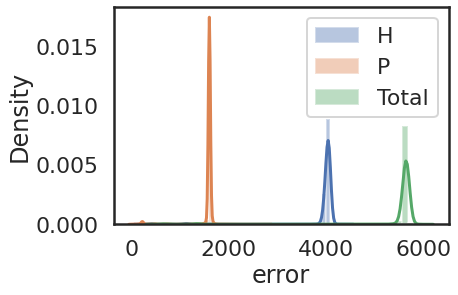

In [17]:
sns.distplot(sum_df.loc[~sum_df.run_id.isin(neg_ids)].h_err, label='H')
sns.distplot(sum_df.loc[~sum_df.run_id.isin(neg_ids)].p_err, label='P')
sns.distplot(sum_df.loc[~sum_df.run_id.isin(neg_ids)].error, label='Total')
plt.legend()


In [18]:
lowest_ids = sum_df.nsmallest(columns='error', n=10)['run_id']

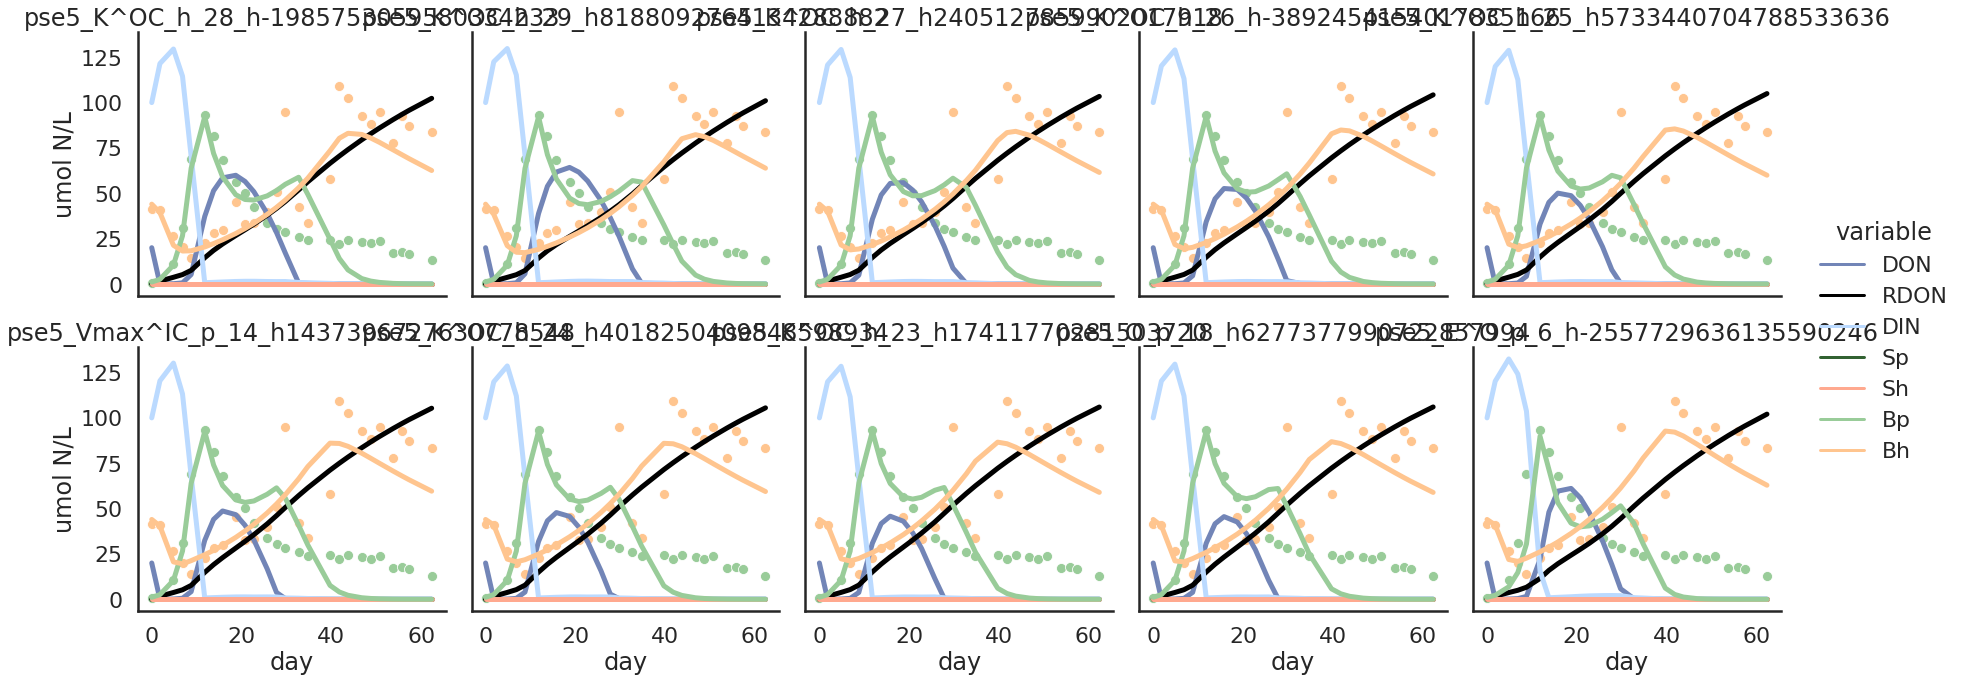

In [19]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [20]:
lowest_ids


162      pse5_K^OC_h_28_h-1985753059580334233
606       pse5_K^OC_h_29_h8188092764134288882
11        pse5_K^OC_h_27_h2405127859902017918
266      pse5_K^OC_h_26_h-3892454154017835166
675       pse5_K^OC_h_25_h5733440704788533636
847    pse5_Vmax^IC_p_14_h1437396727630778548
947       pse5_K^OC_h_24_h4018250409848598934
329         pse5_K^OC_h_23_h17411770281503720
554          pse5_O_p_18_h6277377990722857994
3          pse5_E^O_p_6_h-2557729636135590246
Name: run_id, dtype: object

In [21]:
sum_df.columns

Index(['Unnamed: 0', 'M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 'R_p', 'R_h',
       'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p', 'K^IN_p', 'K^OC_p',
       'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h', 'Vmax^ON_p',
       'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax', 'KT_h',
       'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h', 'tau',
       'r0_p', 'r0_h', 'b_p', 'b_h', 'run_id', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'type'],
      dtype='object')

In [22]:
sum_df.nlargest(10, 'error', )

Unnamed: 0       M_h       M_p  gamma^D_p  gamma^D_h    R_p    R_h  \
27280           0  0.000008  0.000006   0.449707   0.199707  6.625  6.625   
28634           0  0.000006  0.000006   0.378418   0.823730  6.625  6.625   
28813           0  0.000001  0.000002   0.325684   0.386230  6.625  6.625   
20113           0  0.000001  0.000002   0.325684   0.386230  6.625  6.625   
12327           0  0.000001  0.000002   0.325684   0.386230  6.625  6.625   
28289           0  0.000006  0.000006   0.378418   0.356934  6.625  6.625   
9765            0  0.000006  0.000006   0.378418   0.356934  6.625  6.625   
7748            0  0.000006  0.000006   0.378418   0.356934  6.625  6.625   
17232           0  0.000006  0.000006   0.378418   0.356934  6.625  6.625   
25547           0  0.000005  0.000008   0.206543   0.290527  6.625  6.625   

              E^O_p     E^I_p     E^O_h  ...   b_p   b_h  \
27280  2.085368e-07  0.000007  0.000005  ...  0.01  0.01   
28634  1.016744e-05  0.000004  0.000003  ...  0.01  0.01   
28813  4.735311e-06  0.000007  0.000005  ...  0.01  0.01   
20113  4.735311e-06  0.000007  0.000005  ...  0.01  0.01   
12327  4.735311e-06  0.000007  0.000005  ...  0.01  0.01   
28289  1.016744e-05  0.000004  0.000003  ...  0.01  0.01   
9765   1.016744e-05  0.000004  0.000003  ...  0.01  0.01   
7748   1.016744e-05  0.000004  0.000003  ...  0.01  0.01   
17232  1.016744e-05  0.000004  0.000003  ...  0.01  0.01   
25547  5.701701e-06  0.000003  0.000004  ...  0.01  0.01   

                                run_id  status          h_err          p_err  \
27280   se3_21149_h9021080899994806860       0    5060.136014  747244.013716   
28634   se3_41416_h4438319646737141595       0  162182.761014  279498.522063   
28813   se3_53332_h7007028296812871200       0   33857.183241  400426.839823   
20113   se3_53324_h7360796284991649406       0   33732.444464  400169.682541   
12327  se3_53325_h-3131473796794600801       0   33668.375435  398822.097098   
28289  se3_41420_h-7965779106177122321       0  119419.092705  284598.685965   
9765    se3_41431_h3268427185349703842       0  132095.633770  267912.564168   
7748   se3_41432_h-4605769557414816584       0  131782.219727  265849.269719   
17232   se3_41426_h8378606727526422688       0  131783.394454  265750.557818   
25547  se3_61313_h-4142183228792316062       0   56223.916333  209491.856057   

               error   logerror  message  type  
27280  752304.149731  13.530896      NaN   se3  
28634  441681.283077  12.998344      NaN   se3  
28813  434284.023064  12.981454      NaN   se3  
20113  433902.127005  12.980574      NaN   se3  
12327  432490.472533  12.977316      NaN   se3  
28289  404017.778670  12.909214      NaN   se3  
9765   400008.197937  12.899240      NaN   se3  
7748   397631.489446  12.893281      NaN   se3  
17232  397533.952272  12.893036      NaN   se3  
25547  265715.772390  12.490182      NaN   se3  

[10 rows x 52 columns]

In [158]:
i = sum_df.loc[sum_df.error < 610,['error', 'run_id','K^OC_h', 'O_h', 'O_p', 'K^IN_p','K^IN_h', 
         'Vmax^IN_h', 'E^O_p',]]
i['param'] = i['run_id'].str.split('_', n=1, expand=True)[1].str.rsplit('_', n=2, expand=True)[0]
i['run'] = i['run_id'].str.split('_', n=1, expand=True)[0]

i['param'].value_counts()
i.loc[i.run == 'pse5'].sort_values(['param'])

error                                   run_id     K^OC_h       O_h  \
3    579.863505       pse5_E^O_p_6_h-2557729636135590246   0.250272  1.000000   
717  600.304465        pse5_E^O_p_5_h4144494388342706849   0.250272  1.000000   
228  593.313784       pse5_E^O_p_7_h-8629438254955684818   0.250272  1.000000   
471  592.538024      pse5_K^IN_h_20_h4388766600404319534   0.250272  1.000000   
2    608.906383      pse5_K^IN_p_8_h-8723796796973824570   0.250272  1.000000   
694  593.556135       pse5_K^IN_p_9_h8554557147863542150   0.250272  1.000000   
947  557.514599      pse5_K^OC_h_24_h4018250409848598934   5.113964  1.000000   
675  540.315071      pse5_K^OC_h_25_h5733440704788533636   7.025686  1.000000   
606  499.413559      pse5_K^OC_h_29_h8188092764134288882  25.027234  1.000000   
329  573.513255        pse5_K^OC_h_23_h17411770281503720   3.722431  1.000000   
162  494.492079     pse5_K^OC_h_28_h-1985753059580334233  18.217208  1.000000   
130  599.847193     pse5_K^OC_h_21_h-3886502901885528934   1.972262  1.000000   
11   501.773845      pse5_K^OC_h_27_h2405127859902017918  13.260221  1.000000   
266  523.426226     pse5_K^OC_h_26_h-3892454154017835166   9.652054  1.000000   
656  586.160726     pse5_K^OC_h_22_h-7327614454661375401   2.709540  1.000000   
879  608.684006      pse5_K^ON_h_25_h5886123610695946828   0.250272  1.000000   
545  607.295245      pse5_K^ON_h_26_h8420355405715229130   0.250272  1.000000   
761  602.399414        pse5_O_h_18_h-4792337460181774406   0.250272  0.620690   
732  600.278284         pse5_O_h_17_h-548024171073331782   0.250272  0.586207   
945  604.919709         pse5_O_h_11_h-575764986955229766   0.250272  0.379310   
567  597.046609         pse5_O_h_15_h5546884731466947514   0.250272  0.517241   
642  596.200889         pse5_O_h_14_h7168757705534036410   0.250272  0.482759   
528  597.091679         pse5_O_h_13_h6722264418327733946   0.250272  0.448276   
430  598.965176         pse5_O_h_16_h6494797120873970362   0.250272  0.551724   
346  605.863495        pse5_O_h_19_h-8530086507270443334   0.250272  0.655172   
31   599.874545         pse5_O_h_12_h3356204756630991418   0.250272  0.413793   
651  596.690944        pse5_O_p_21_h-4860063198504744950   0.250272  1.000000   
554  577.260954         pse5_O_p_18_h6277377990722857994   0.250272  1.000000   
408  589.559730         pse5_O_p_20_h4613864194240133898   0.250272  1.000000   
778  583.076932         pse5_O_p_19_h6282582612064188682   0.250272  1.000000   
161  604.396327         pse5_O_p_22_h7567685004036367626   0.250272  1.000000   
847  554.336518   pse5_Vmax^IC_p_14_h1437396727630778548   0.250272  1.000000   
963  603.588204   pse5_Vmax^IN_h_12_h7771804175744468259   0.250272  1.000000   
721  607.029178  pse5_Vmax^ON_h_13_h-2475959529995658176   0.250272  1.000000   
648  592.729111    pse5_gamma^D_h_25_h878213036671489369   0.250272  1.000000   

          O_p    K^IN_p    K^IN_h  Vmax^IN_h     E^O_p      param   run  
3    1.000000  1.427508  0.250272   0.000010  0.000002      E^O_p  pse5  
717  1.000000  1.427508  0.250272   0.000010  0.000002      E^O_p  pse5  
228  1.000000  1.427508  0.250272   0.000010  0.000003      E^O_p  pse5  
471  1.000000  1.427508  1.435600   0.000010  0.000001     K^IN_h  pse5  
2    1.000000  0.181145  0.250272   0.000010  0.000001     K^IN_p  pse5  
694  1.000000  0.248862  0.250272   0.000010  0.000001     K^IN_p  pse5  
947  1.000000  1.427508  0.250272   0.000010  0.000001     K^OC_h  pse5  
675  1.000000  1.427508  0.250272   0.000010  0.000001     K^OC_h  pse5  
606  1.000000  1.427508  0.250272   0.000010  0.000001     K^OC_h  pse5  
329  1.000000  1.427508  0.250272   0.000010  0.000001     K^OC_h  pse5  
162  1.000000  1.427508  0.250272   0.000010  0.000001     K^OC_h  pse5  
130  1.000000  1.427508  0.250272   0.000010  0.000001     K^OC_h  pse5  
11   1.000000  1.427508  0.250272   0.000010  0.000001     K^OC_h  pse5  
266  1.000000  1.427508  0.250272   0.000010  0.000001   

In [24]:
sum_df.nsmallest(columns='error', n=1).T

162
Unnamed: 0                                     0
M_h                                     0.000001
M_p                                     0.000001
gamma^D_p                                    0.8
gamma^D_h                                    0.8
R_p                                        6.625
R_h                                        6.625
E^O_p                                   0.000001
E^I_p                                        0.0
E^O_h                                        0.0
E^I_h                                   0.000001
K^ON_p                                  0.142751
K^IN_p                                  1.427508
K^OC_p                                  0.142751
K^IC_p                                  0.142751
K^ON_h                                  0.250272
K^IN_h                                  0.250272
K^OC_h                                 18.217208
K^IC_h                                  0.250272
Vmax^ON_p                                    0.0
Vmax^IN_p                                0.00001
Vmax^OC_p                                    0.0
Vmax^IC_p                               0.000093
Vmax^ON_h                               0.000005
Vmax^IN_h                                0.00001
Vmax^OC_h                               0.000033
Vmax^IC_h                                    0.0
O_p                                          1.0
O_h                                          1.0
epsilon                                 0.000001
VTmax                                   0.000002
KT_h                                    0.250272
omega                                       0.01
K^S_p                                   14.27508
K^S_h                                   14.27508
E^S_p                                        0.0
E^S_h                                        0.0
M^S_p                                       -0.0
M^S_h                                       -0.0
tau                                 52173.913043
r0_p                                    0.000002
r0_h                                    0.000002
b_p                                         0.01
b_h                                         0.01
run_id      pse5_K^OC_h_28_h-1985753059580334233
status                                         0
h_err                                 259.533774
p_err                                 234.958305
error                                 494.492079
logerror                                6.203531
message                                      NaN
type                                        pse5

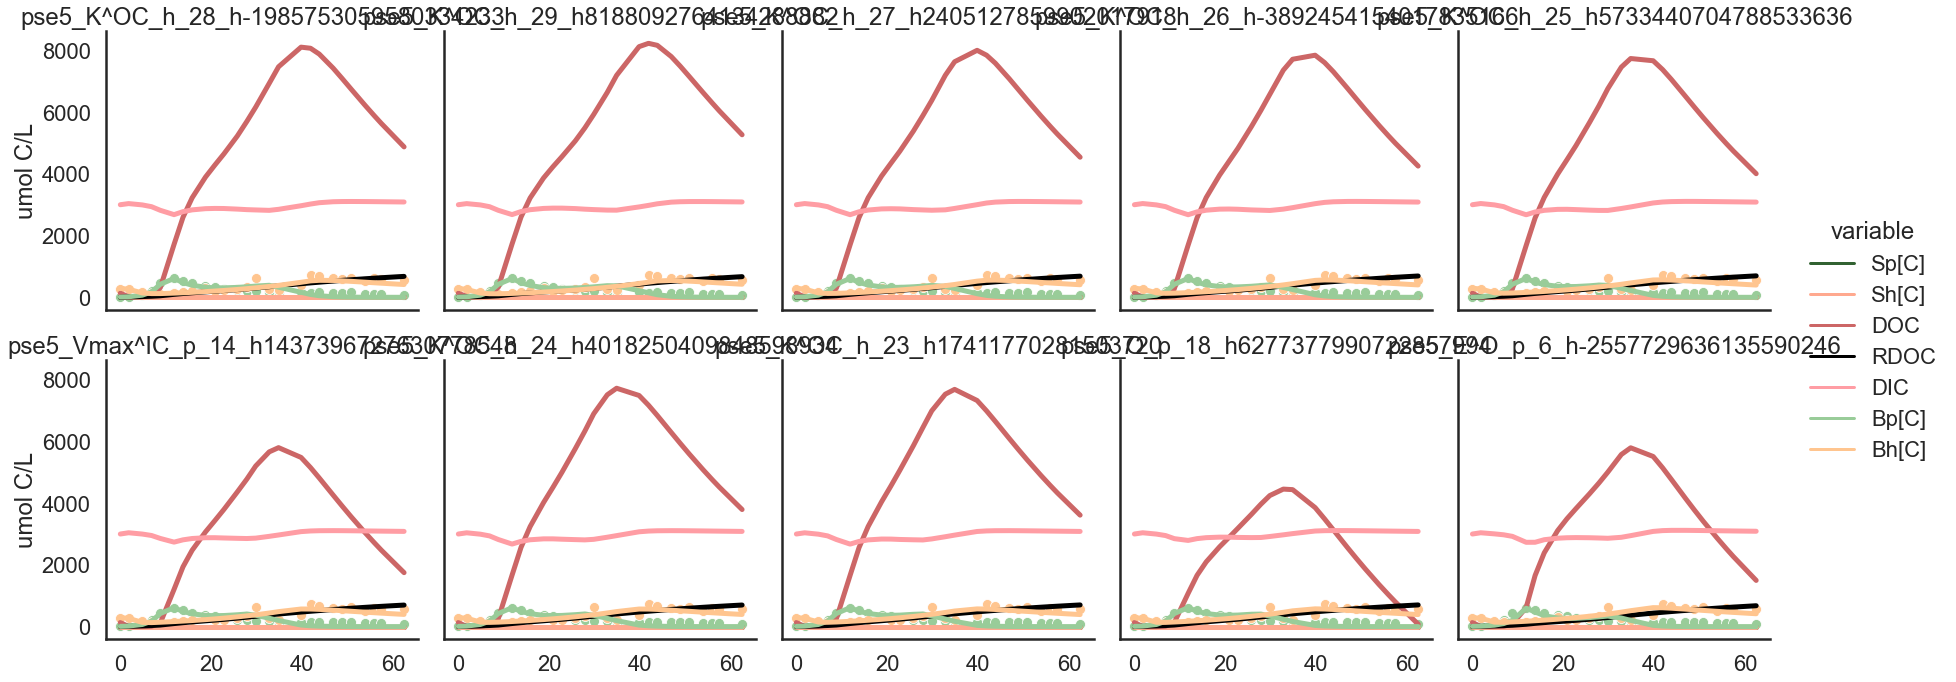

In [25]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=cccorder, palette=cccpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol C/L')
g.set_titles(col_template='{col_name}',)



In [26]:
df.shape

In [27]:
pos_run_ids = df.loc[(df.day >= 12) & ((df['Bp'] > 1e-1) | (df['Bh'] > 1e-1)), 'run_id'].unique()


In [28]:
pos_run_ids2 = df.loc[(df.day >= 5) & ((df['Bp'] > 1e-1) | (df['Bh'] > 1e-1)), 'run_id'].unique()


In [29]:
max_day = df.loc[((df['Bp'] > 1e-1) | (df['Bh'] > 1e-1))].groupby('run_id')['day'].max()

In [30]:
max_day

run_id
de3_h-1073436347008145156         11.803472
de3_h-1575953767854033835          4.832639
de3_h-1659825646723300236          8.779167
de3_h-1765083009615901515          6.853472
de3_h-2171644033102072858         11.803472
                                    ...    
se4_9997_h-3754506412674489931     1.820833
se4_9998_h-3906930901186799149     1.820833
se4_9999_h3201429608343814550      1.820833
se4_999_h57759537092892476         1.820833
se4_99_h-2888973244660551875       1.820833
Name: day, Length: 112405, dtype: float64

In [113]:
sum_df['max_nonzero_day'] = sum_df.run_id.map(max_day)

In [31]:
max_day.value_counts()

1.820833     47019
4.832639     18223
8.779167     13724
6.853472     12647
11.803472     4840
62.351389     3080
13.770833     3026
15.774306     2751
18.715278     1304
22.753472     1175
20.777778     1155
34.771528      534
29.747917      505
25.720139      499
43.717361      371
41.790972      363
27.794444      250
32.721528      218
39.713889      181
48.746528      160
53.763889      108
46.776389       93
57.351389       65
50.740278       58
55.800694       48
0.000000         8
Name: day, dtype: int64

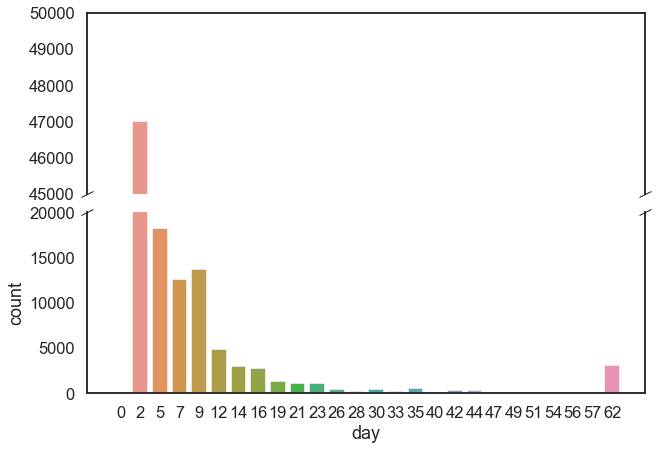

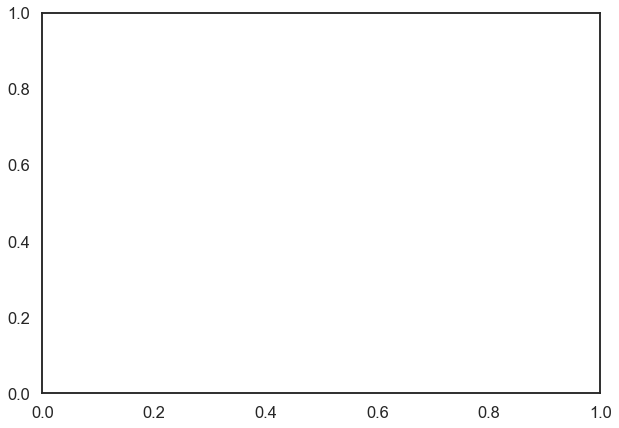

In [70]:
sns.set_context('talk')
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,7))
fig.subplots_adjust(hspace=0.1)  # adjust space between axes
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x=max_day.round(0).astype(int), ax=ax1)
sns.countplot(x=max_day.round(0).astype(int), ax=ax2)
ax1.set_ylim(45000, 50000)  # outliers only
ax2.set_ylim(0, 20000)  # most of the data
# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.spines.top.set_visible(False)
#ax1.xaxis.tick_top()
#ax1.tick_params(labeltop=False)  # don't put tick labels at the top
#ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.show()
#sns.despine()
#plt.yscale('log')
#ax1.title("last day where there's non zero biomass (>0.1 umol N/L)")

In [33]:
pos_run_ids2.shape

In [34]:
pos_run_ids.shape

In [35]:
sum_df['negative'] = False
sum_df.loc[sum_df.run_id.isin(neg_ids), 'negative'] = True

In [71]:
sum_df['zero'] = False
sum_df.loc[~sum_df.run_id.isin(pos_run_ids2), 'zero'] = True

In [72]:
sum_df.groupby(['negative', 'zero'])['run_id'].count()

negative  zero 
False     False    43341
          True     60590
True      False     3814
          True      4725
Name: run_id, dtype: int64

In [ ]:
112470 - 

In [73]:
import hdbscan


In [74]:
import umap

In [75]:
mdf.day.unique()

array([ 0.        ,  1.82083333,  4.83263889,  6.85347222,  8.77916667,
       11.80347222, 13.77083333, 15.77430556, 18.71527778, 20.77777778,
       22.75347222, 25.72013889, 27.79444444, 29.74791667, 32.72152778,
       34.77152778, 39.71388889, 41.79097222, 43.71736111, 46.77638889,
       48.74652778, 50.74027778, 53.76388889, 55.80069444, 57.35138889,
       62.35138889])

In [76]:
sample_cols_umap = ['Bp', 'Bh', 'DON', 'DIN', 'RDON', 'DOC', 'DIC', 'RDOC']
sample_cols_HDBSCAN = ['Bp', 'Bh',]

sample_days = [ 5, 12, 16, 19, 42, 62]
#sample_days_2 = [ 5, 12, 16, 20, 42, 60]




In [79]:
tdf = mdf.loc[mdf.day.round(0).isin(sample_days) 
              & mdf.variable.isin(sample_cols_umap) 
              & mdf.run_id.isin(sum_df.run_id)
              & mdf.run_id.isin(pos_run_ids2)
              & ~mdf.run_id.isin(neg_ids)
             ]
tdf['day0'] = tdf.day.round(0)
Xu = tdf.pivot(index='run_id', columns=['variable', 'day0'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [80]:
tdf2 = mdf.loc[mdf.day.round(0).isin(sample_days) 
              & mdf.variable.isin(sample_cols_HDBSCAN) 
              & mdf.run_id.isin(sum_df.run_id)
              & mdf.run_id.isin(pos_run_ids2)
              & ~mdf.run_id.isin(neg_ids)
             ]
tdf2['day0'] = tdf2.day.round(0)
Xh = tdf2.pivot(index='run_id', columns=['variable', 'day0'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [81]:
reducer = umap.UMAP(random_state=42)
umap_embedding = reducer.fit_transform(Xu)

In [114]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [115]:
udf['run_id'] = Xu.index

In [116]:
udf = pd.merge(udf, sum_df, on='run_id', how='left')

In [86]:
udf.loc[udf.logerror.isna()]

Empty DataFrame
Columns: [UMAP1, UMAP2, run_id, Unnamed: 0, M_h, M_p, gamma^D_p, gamma^D_h, R_p, R_h, E^O_p, E^I_p, E^O_h, E^I_h, K^ON_p, K^IN_p, K^OC_p, K^IC_p, K^ON_h, K^IN_h, K^OC_h, K^IC_h, Vmax^ON_p, Vmax^IN_p, Vmax^OC_p, Vmax^IC_p, Vmax^ON_h, Vmax^IN_h, Vmax^OC_h, Vmax^IC_h, O_p, O_h, epsilon, VTmax, KT_h, omega, K^S_p, K^S_h, E^S_p, E^S_h, M^S_p, M^S_h, tau, r0_p, r0_h, b_p, b_h, status, h_err, p_err, error, logerror, message, type, negative, zero]
Index: []

[0 rows x 56 columns]

<AxesSubplot:>

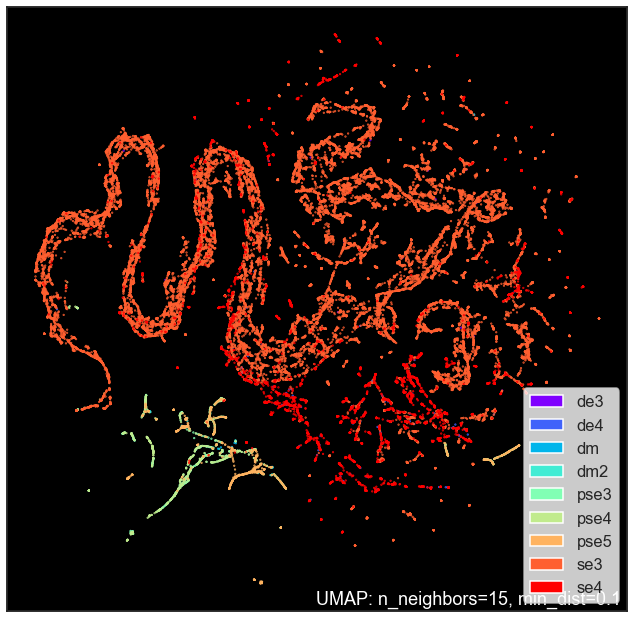

In [87]:
import umap.plot
umap.plot.points(reducer, labels=udf['type'], theme='fire')

<AxesSubplot:>

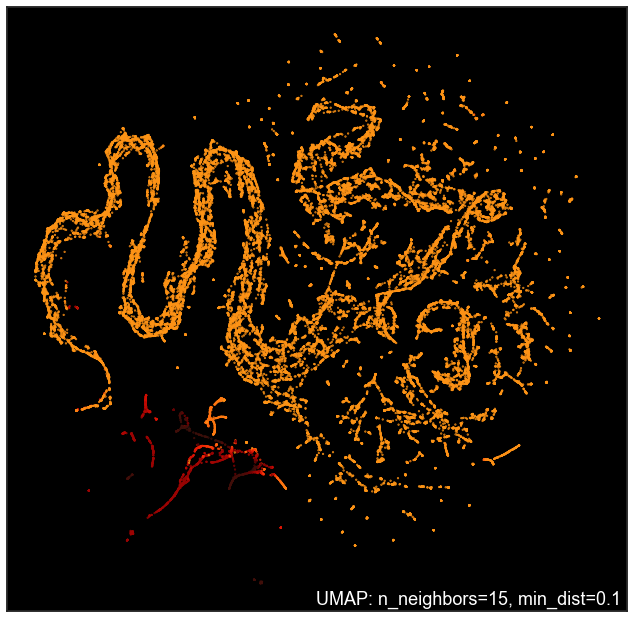

In [95]:
import umap.plot
umap.plot.points(reducer, values=udf['logerror'], theme='darkred')

<AxesSubplot:>

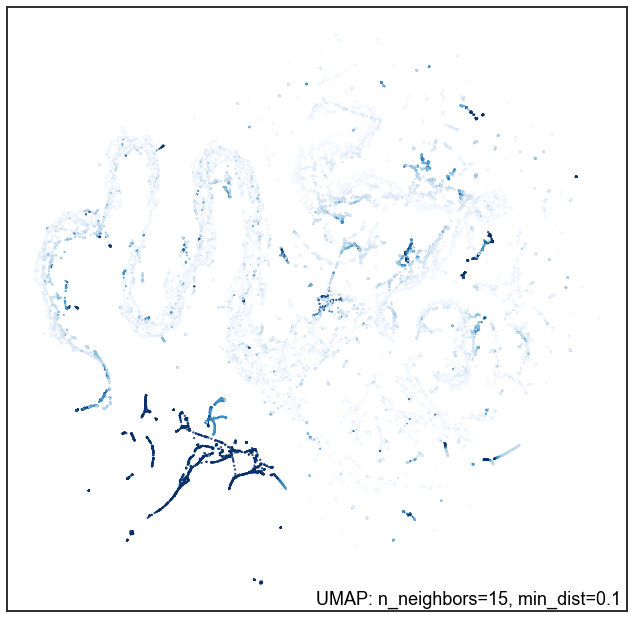

In [119]:
import umap.plot
umap.plot.points(reducer, values=udf['max_nonzero_day'], theme='blue',show_legend=True)

In [96]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=400, 
    min_samples=5, 
    core_dist_n_jobs=1, 
    cluster_selection_epsilon = 10.0,
    #cluster_selection_method='leaf'
)
clusterer.fit(Xu)


HDBSCAN(cluster_selection_epsilon=10.0, core_dist_n_jobs=1,
        min_cluster_size=400, min_samples=5)

In [97]:
clusterer.labels_

array([-1, -1,  9, ...,  6, -1, -1], dtype=int64)

In [98]:
clusterer.labels_.max()

9

In [99]:
(clusterer.labels_ < 0).sum()

20558

In [100]:
np.unique(clusterer.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 array([20558,   693,  1146,   433,   618,   790,   401,   655, 14264,
         3376,   407], dtype=int64))

In [101]:
udf.shape

In [120]:
udf['cluster'] = clusterer.labels_

<AxesSubplot:>

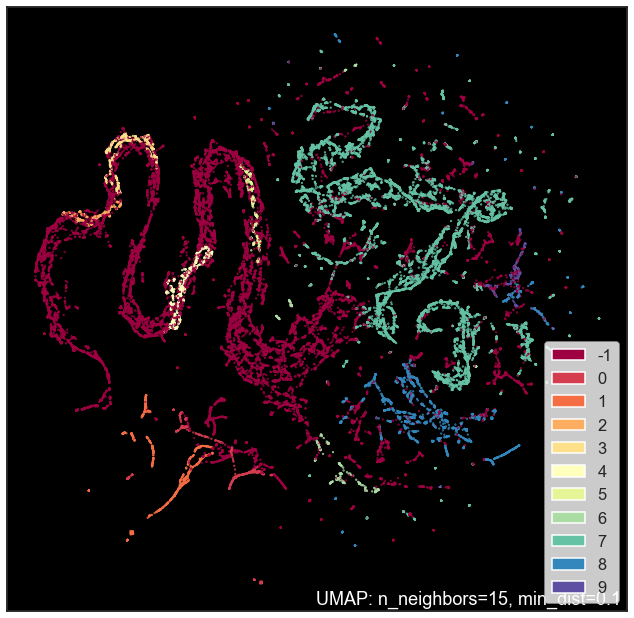

In [104]:
import umap.plot
umap.plot.points(reducer, labels=udf['cluster'], theme='viridis')

In [105]:
clusterer2 = hdbscan.HDBSCAN(
    min_cluster_size=500, 
    min_samples=10, 
    core_dist_n_jobs=1, 
    #cluster_selection_epsilon = 0.01,
    #cluster_selection_method='leaf'
)
clusterer2.fit(Xu.loc[Xu.index.isin(udf.loc[udf.cluster==-1, 'run_id'])])


HDBSCAN(core_dist_n_jobs=1, min_cluster_size=500, min_samples=10)

In [106]:
clusterer2.labels_.max()

2

In [107]:
(clusterer2.labels_ < 0).sum()

8542

In [108]:
np.unique(clusterer2.labels_, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([8542, 1375, 9868,  773], dtype=int64))

In [121]:
udf['cluster2'] = udf['cluster']
udf.loc[udf.cluster==-1, 'cluster2'] = clusterer2.labels_ + udf['cluster'].max() + 2

<AxesSubplot:>

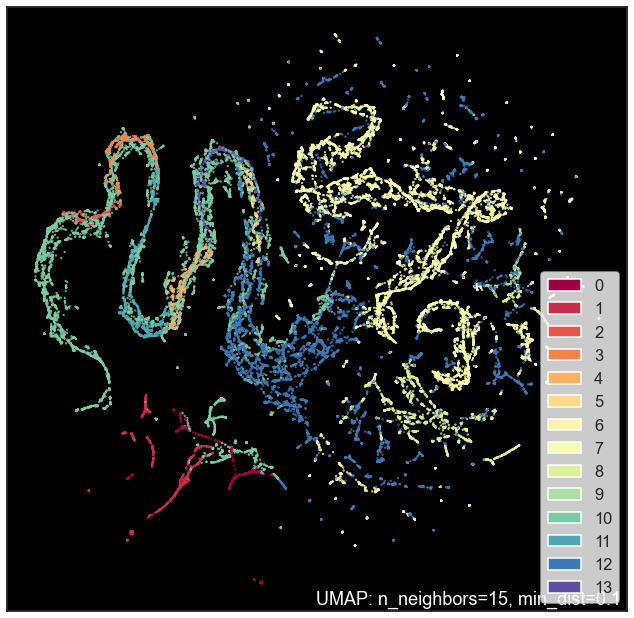

In [122]:
import umap.plot
umap.plot.points(reducer, labels=udf['cluster2'], theme='viridis')

<AxesSubplot:>

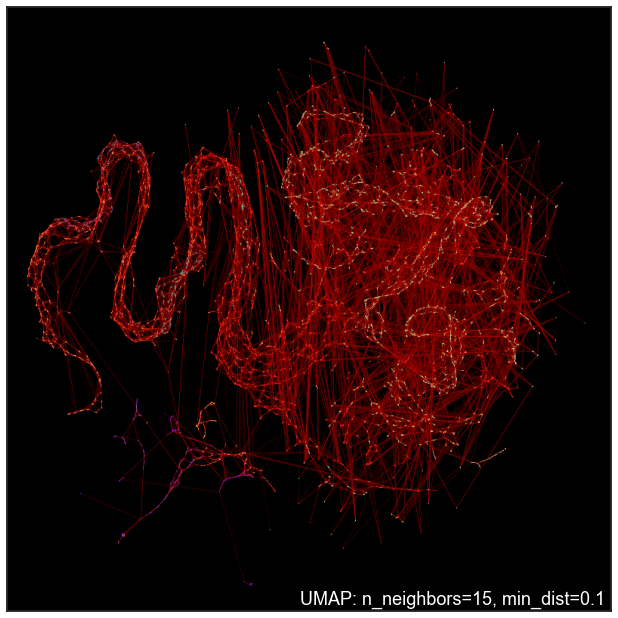

In [123]:
umap.plot.connectivity(reducer, show_points=True, theme='fire',
                       labels=udf['cluster2'],#edge_bundling='hammer'
                      )

In [124]:
udf.groupby('cluster2')['error'].describe()

count         mean         std          min          25%  \
cluster2                                                               
0           693.0   841.930649  518.647162   501.773845   653.613787   
1          1146.0  1498.751477  379.965202   947.275939  1356.432265   
2           433.0  5640.046489   44.824834  5580.774184  5616.634978   
3           618.0  5630.541342   21.690429  5569.351890  5617.155243   
4           790.0  5622.834792   29.675339  5527.631479  5603.771648   
5           401.0  5625.955807   29.634817  5582.937283  5607.052765   
6           655.0  5643.094059   10.338384  5576.706444  5637.505221   
7         14264.0  5611.181925   35.183663  5274.248095  5597.877024   
8          3376.0  5624.049262   42.885465  4811.855501  5617.058018   
9           407.0  5637.083727   17.249112  5596.619048  5622.976937   
10         8542.0  5327.645882  932.676971   494.492079  5573.005557   
11         1375.0  5623.046273   30.409172  5438.507308  5604.375576   
12         9868.0  5610.240297  114.998160  3638.072579  5604.212116   
13          773.0  5624.820240   35.372446  5558.512144  5602.517040   

                  50%          75%          max  
cluster2                                         
0          653.795689   667.992538  4235.589708  
1         1357.147261  1370.803895  3366.605169  
2         5633.184890  5655.649187  5862.982815  
3         5628.781854  5647.822144  5721.775649  
4         5617.861472  5632.645770  5820.467229  
5         5619.309838  5632.002659  5734.902757  
6         5645.589552  5648.676444  5673.513786  
7         5607.267714  5623.179011  5929.336771  
8         5630.999536  5640.477797  5745.822399  
9         5636.984817  5644.640199  5695.894005  
10        5602.193471  5627.147676  6017.070345  
11        5617.085629  5633.162755  5885.034092  
12        5627.752337  5648.657941  5930.400788  
13        5619.182193  5639.200688  5799.766730

In [125]:
udf.groupby(['type', 'cluster'])['run_id'].count()

type  cluster
de3   -1            31
       2             1
       3             1
       4             1
       5             1
       7            18
       8             1
       9             1
de4   -1            78
       6            14
       7             3
       8            56
       9             1
dm    -1            35
       1            32
dm2   -1            22
       0            38
       1             7
pse3  -1           272
       0            59
       1           544
       8            56
pse4  -1           312
       0            42
       1           536
       8            78
pse5  -1           306
       0           554
       1            27
       8            78
se3   -1         15864
       2           432
       3           616
       4           788
       5           399
       7         14092
       8          1086
       9           344
se4   -1          3638
       3             1
       4             1
       5             1
       6           6

In [126]:
udf.groupby(['type', 'cluster2'])['run_id'].count()

type  cluster2
de3   2               1
      3               1
      4               1
      5               1
      7              18
      8               1
      9               1
      10             14
      12             16
      13              1
de4   6              14
      7               3
      8              56
      9               1
      10             10
      12             68
dm    1              32
      10             35
dm2   0              38
      1               7
      10             22
pse3  0              59
      1             544
      8              56
      10            252
      12             20
pse4  0              42
      1             536
      8              78
      10            291
      12             21
pse5  0             554
      1              27
      8              78
      10            283
      12             23
se3   2             432
      3             616
      4             788
      5             399
      7           14092
 

In [127]:
sorted(udf.cluster2.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [128]:
udf.columns

Index(['UMAP1', 'UMAP2', 'run_id', 'Unnamed: 0', 'M_h', 'M_p', 'gamma^D_p',
       'gamma^D_h', 'R_p', 'R_h', 'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p',
       'K^IN_p', 'K^OC_p', 'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h',
       'Vmax^ON_p', 'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h',
       'Vmax^IN_h', 'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax',
       'KT_h', 'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h',
       'tau', 'r0_p', 'r0_h', 'b_p', 'b_h', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'type', 'negative', 'zero',
       'max_nonzero_day', 'cluster', 'cluster2'],
      dtype='object')

In [129]:
sum_df.columns

Index(['Unnamed: 0', 'M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 'R_p', 'R_h',
       'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p', 'K^IN_p', 'K^OC_p',
       'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h', 'Vmax^ON_p',
       'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax', 'KT_h',
       'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h', 'tau',
       'r0_p', 'r0_h', 'b_p', 'b_h', 'run_id', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'type', 'negative', 'zero',
       'max_nonzero_day'],
      dtype='object')

In [130]:
sum_df2 = pd.merge(sum_df, udf[['run_id', 'cluster', 'cluster2', 'UMAP1', 'UMAP2', ]],
                  on='run_id', how='left')
sum_df2
#    & mdf.run_id.isin(pos_run_ids)
#              & ~mdf.run_id.isin(neg_ids)
#udf = pd.merge(udf, sum_df, on='run_id', how='left')

Unnamed: 0           M_h           M_p  gamma^D_p  gamma^D_h    R_p  \
0                0  4.502398e-06  3.996791e-06   0.365975   0.070244  6.625   
1                0  4.001982e-06  7.086781e-06   0.040492   0.911524  6.625   
2                0  5.660195e-06  1.106181e-05   0.701770   0.569487  6.625   
3                0  7.570845e-06  9.444341e-06   0.079173   0.384086  6.625   
4                0  6.165933e-07  1.176978e-08   0.201885   0.221401  6.625   
...            ...           ...           ...        ...        ...    ...   
112465           0  9.805185e-06  9.805185e-06   0.133301   0.297363  6.625   
112466           0  1.117282e-05  1.881917e-06   0.286621   0.175293  6.625   
112467           0  1.412851e-07  2.548783e-06   0.916504   0.455566  6.625   
112468           0  3.724275e-06  1.520228e-06   0.204590   0.202637  6.625   
112469           0  8.335820e-06  3.238254e-06   0.149902   0.257324  6.625   

          R_h     E^O_p         E^I_p         E^O_h  ...  logerror  message  \
0       6.625  0.000009  1.013520e-05  2.476267e-07  ...  8.631307      NaN   
1       6.625  0.000003  1.028460e-06  6.359510e-06  ...  8.619667      NaN   
2       6.625  0.000004  7.134792e-06  9.880638e-07  ...  8.618590      NaN   
3       6.625  0.000007  1.361663e-06  7.726777e-06  ...  8.635134      NaN   
4       6.625  0.000008  5.495765e-06  4.297097e-06  ...  8.634655      NaN   
...       ...       ...           ...           ...  ...       ...      ...   
112465  6.625  0.000004  2.543132e-08  3.067017e-06  ...  8.643458      NaN   
112466  6.625  0.000008  7.217407e-06  4.196167e-06  ...  8.635669      NaN   
112467  6.625  0.000004  7.817586e-06  6.098429e-06  ...  8.642730      NaN   
112468  6.625  0.000006  5.050659e-06  4.745483e-06  ...  8.643537      NaN   
112469  6.625  0.000002  3.341675e-06  5.152384e-06  ...  8.637539      NaN   

        type  negative   zero  max_nonzero_day  cluster  cluster2     UMAP1  \
0        de3     False  False         8.779167      7.0       7.0  8.551019   
1        de3     False  False        25.720139      7.0       7.0  9.525745   
2        de3     False  False        22.753472     -1.0      10.0  0.573815   
3        de3     False  False         8.779167     -1.0      10.0 -1.609419   
4        de3     False  False         8.779167     -1.0      12.0  3.171893   
...      ...       ...    ...              ...      ...       ...       ...   
112465   se4     False   True         1.820833      NaN       NaN       NaN   
112466   se4      True   True         4.832639      NaN       NaN       NaN   
112467   se4     False   True         1.820833      NaN       NaN       NaN   
112468   se4     False   True         1.820833      NaN       NaN       NaN   
112469   se4      True   True         4.832639      NaN       NaN       NaN   

            UMAP2  
0       14.969038  
1       11.655981  
2       11.419992  
3        9.430687  
4        3.971223  
...           ...  
112465        NaN  
112466        NaN  
112467        NaN  
112468        NaN  
112469        NaN  

[112470 rows x 59 columns]

In [131]:
sum_df2.loc[sum_df2.zero, 'cluster2'] = 'zero'
sum_df2.loc[sum_df2.negative, 'cluster2'] = 'negative'


In [132]:
sum_df2.groupby(['cluster2', 'type' ]).run_id.count()

cluster2  type
0.0       dm2        38
          pse3       59
          pse4       42
          pse5      554
1.0       dm         32
                  ...  
negative  se4      7517
zero      de3        10
          de4       862
          se3      7013
          se4     52705
Name: run_id, Length: 69, dtype: int64

7.0


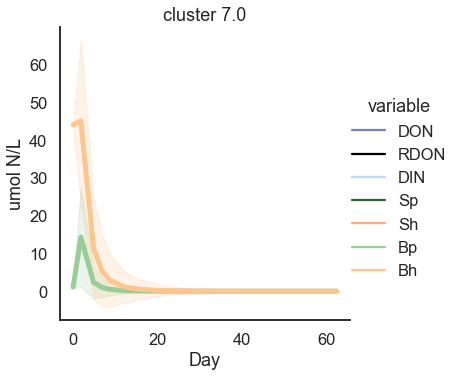

10.0


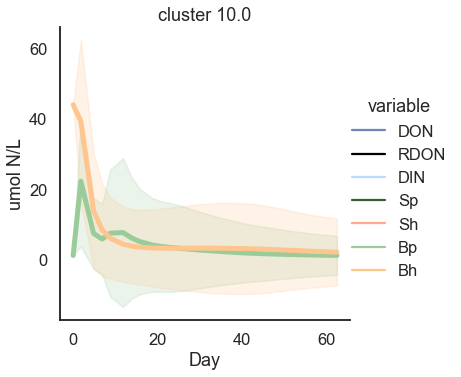

12.0


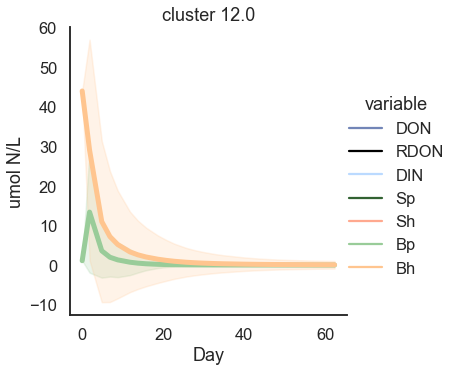

4.0


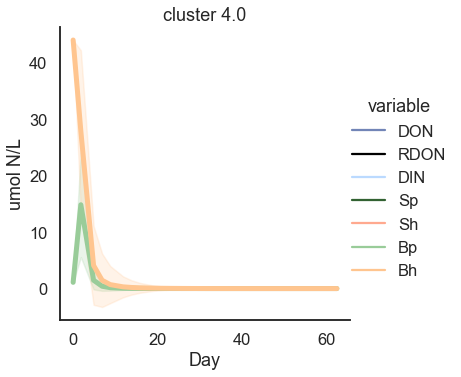

zero


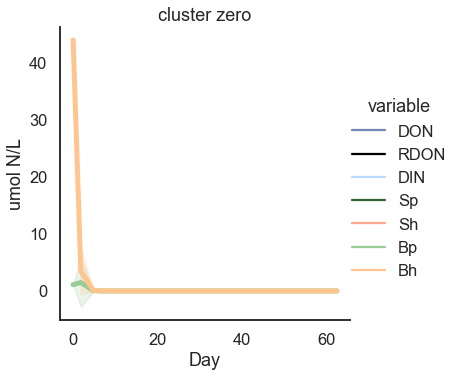

5.0


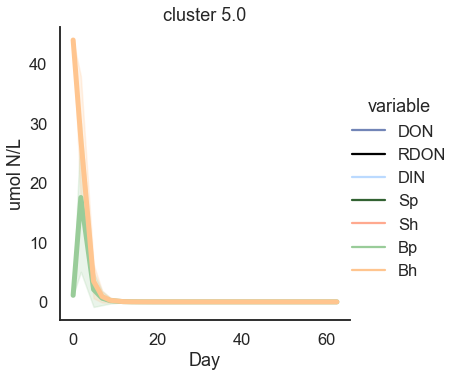

3.0


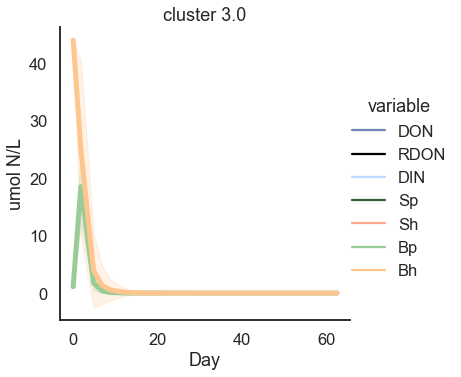

8.0


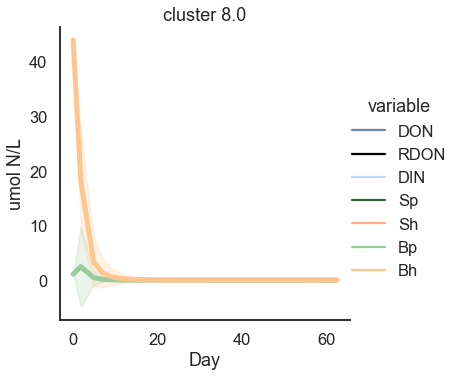

9.0


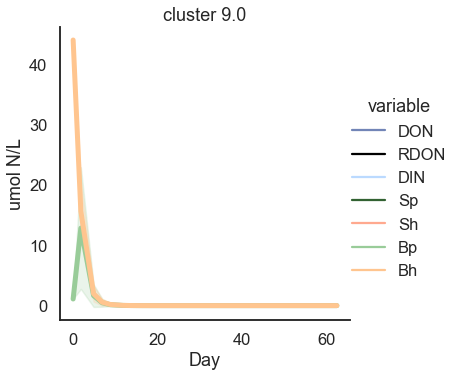

negative


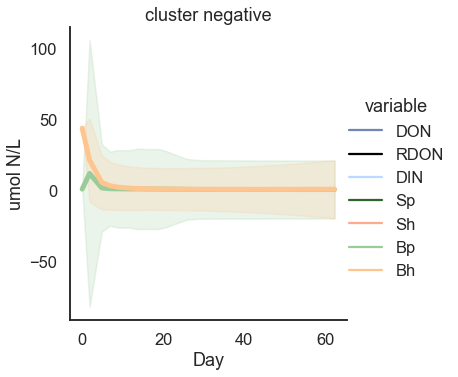

2.0


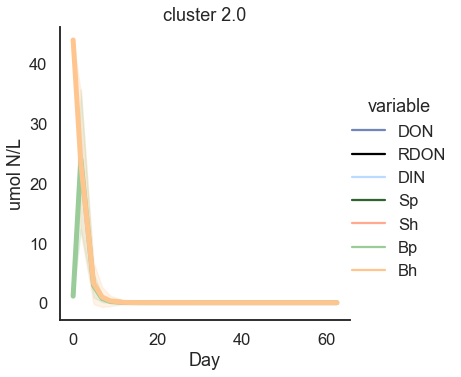

13.0


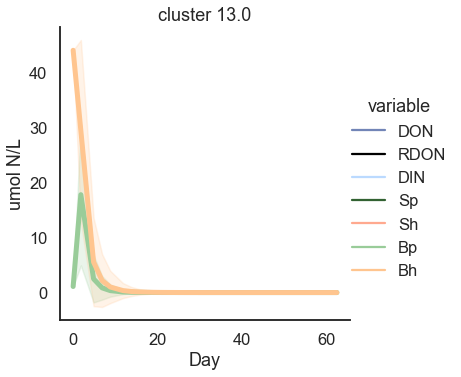

6.0


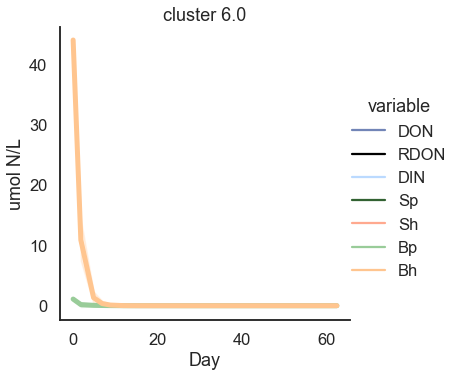

0.0


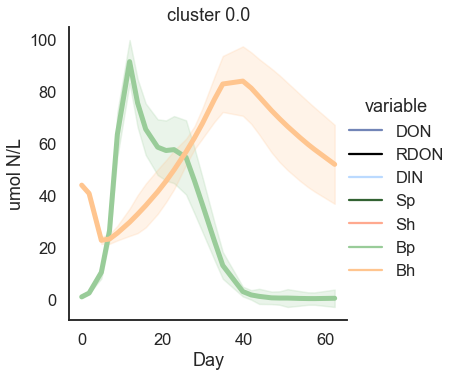

1.0


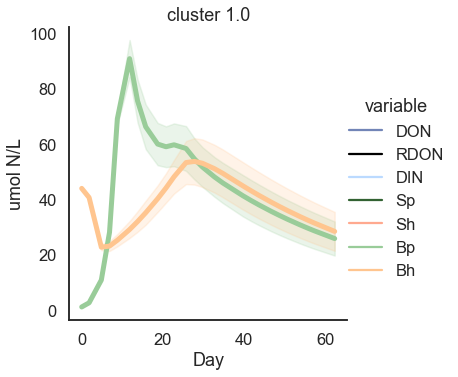

11.0


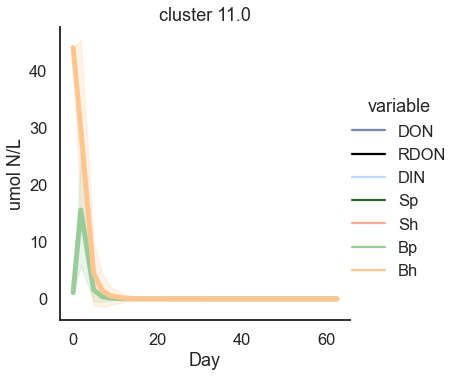

In [134]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in (sum_df2.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(sum_df2.loc[sum_df2.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(['Bp', 'Bh']) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


0


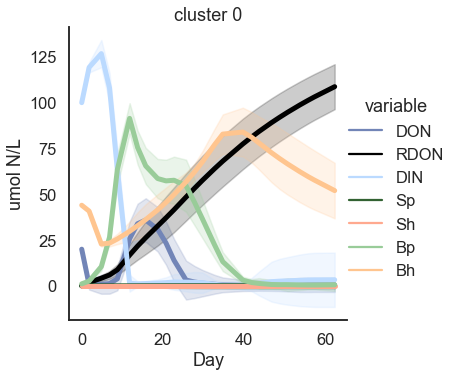

1


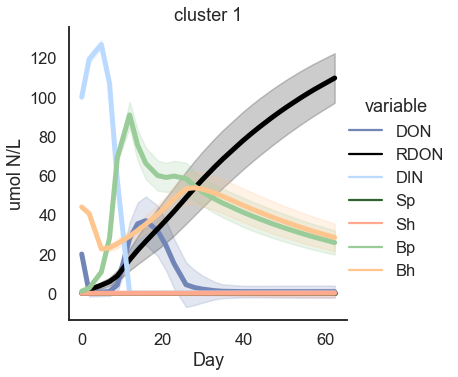

2


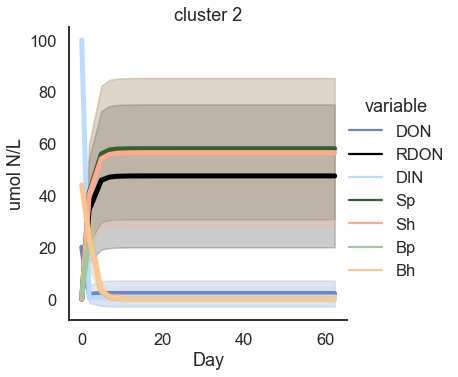

3


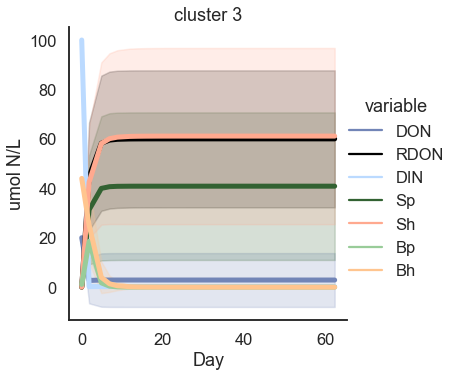

4


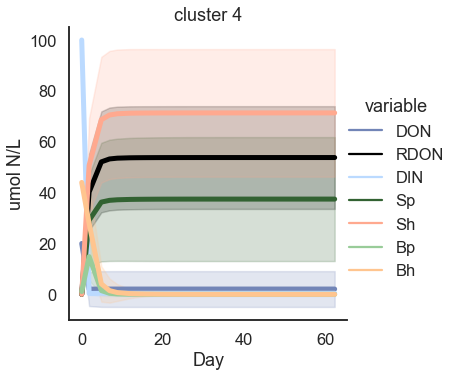

5


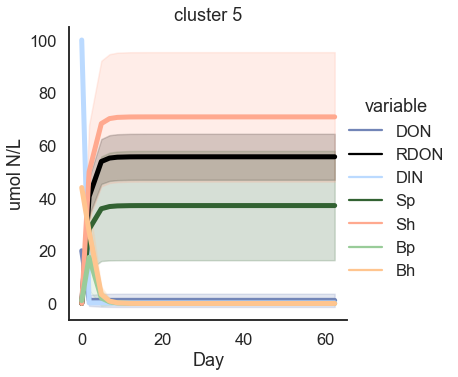

6


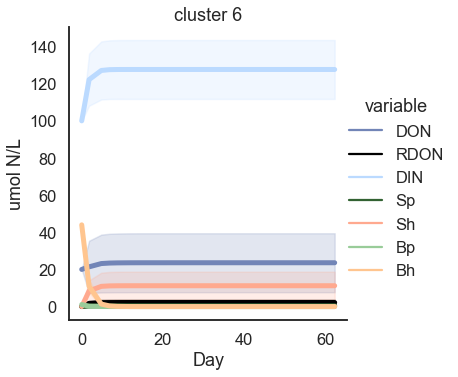

7


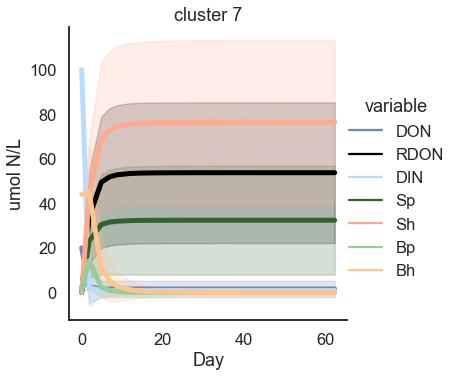

8


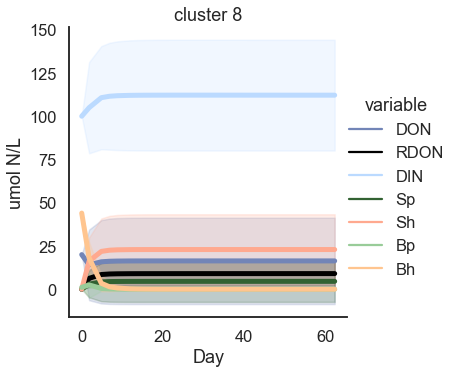

9


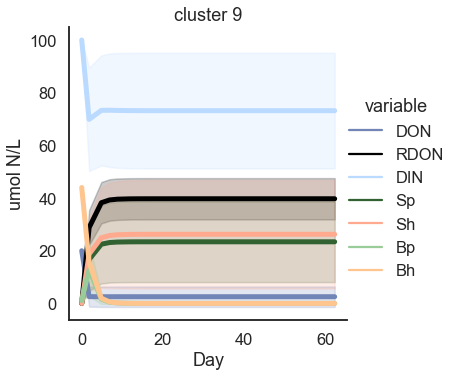

10


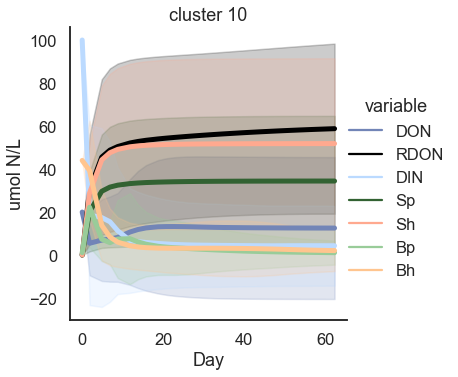

11


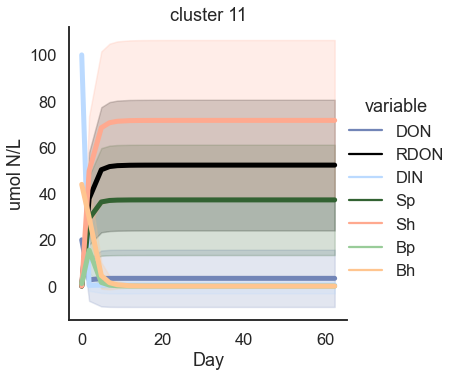

12


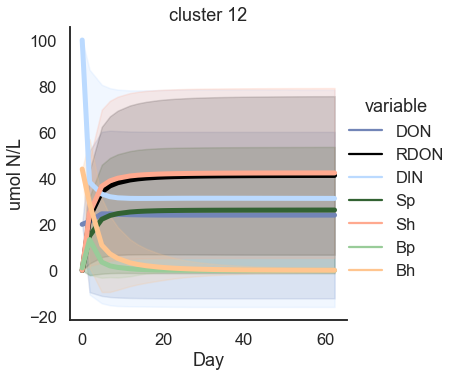

13


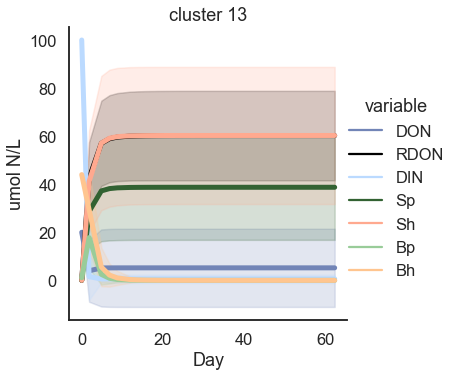

In [135]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


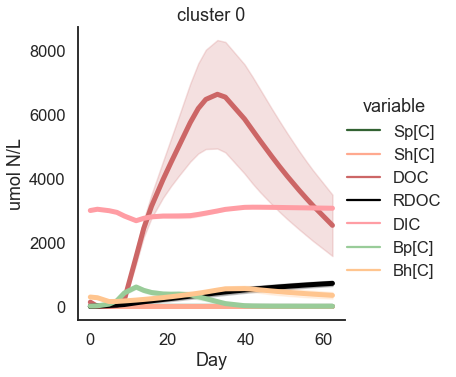

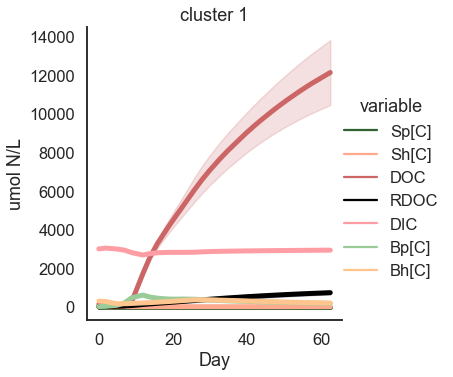

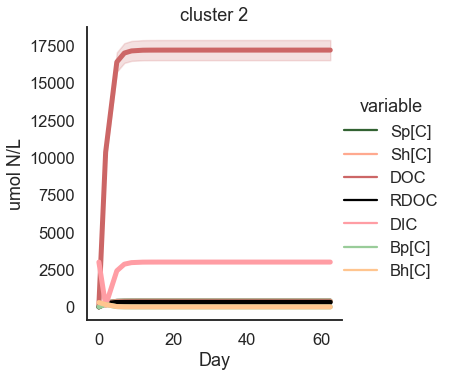

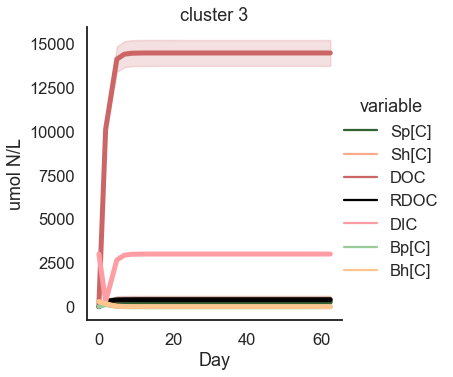

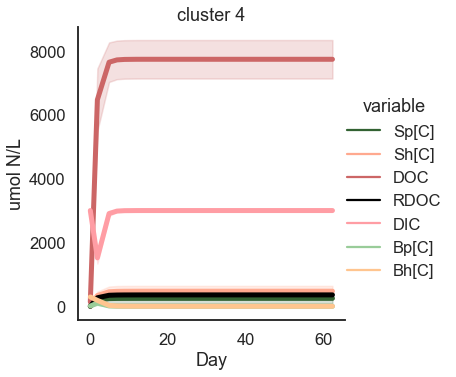

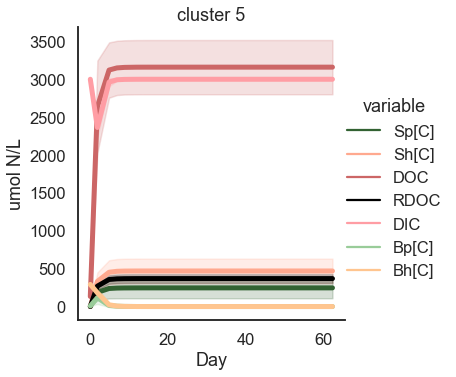

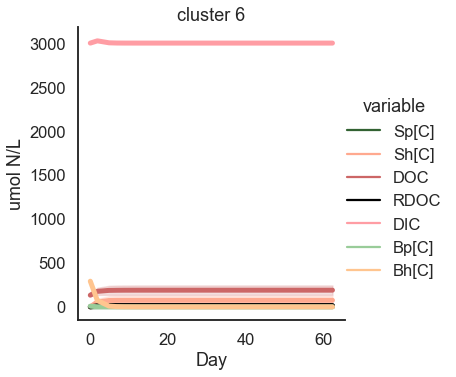

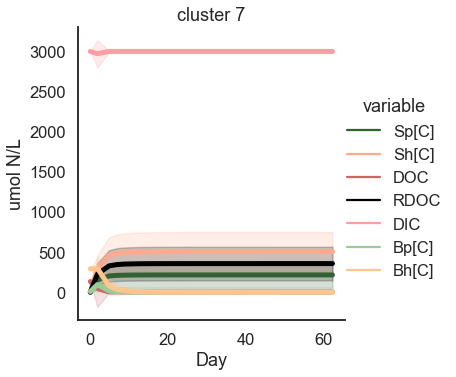

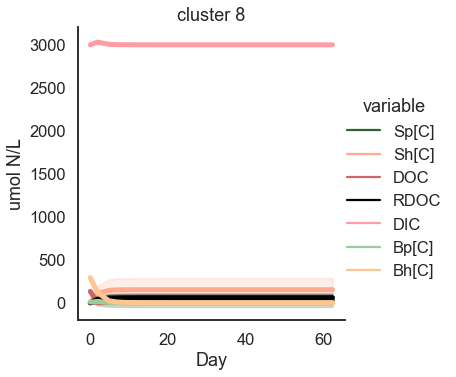

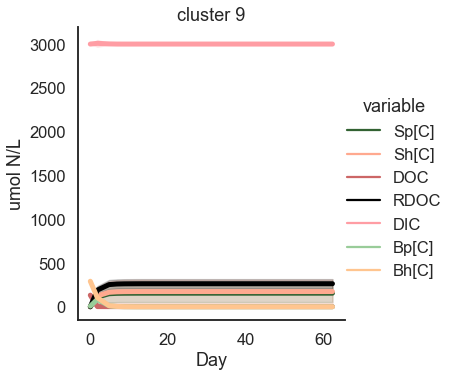

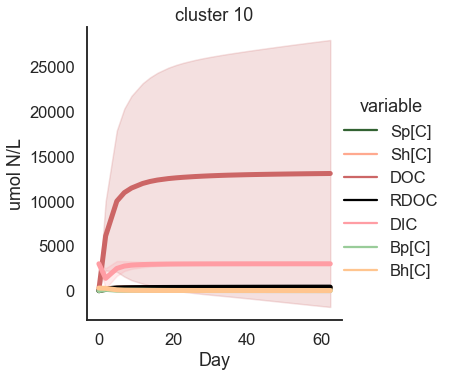

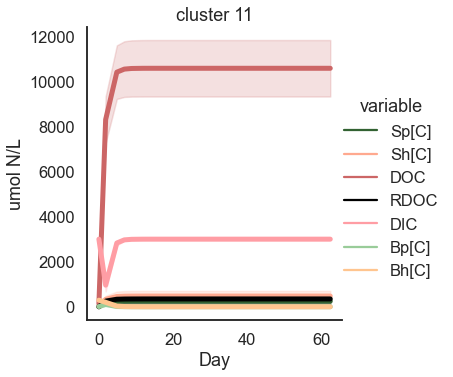

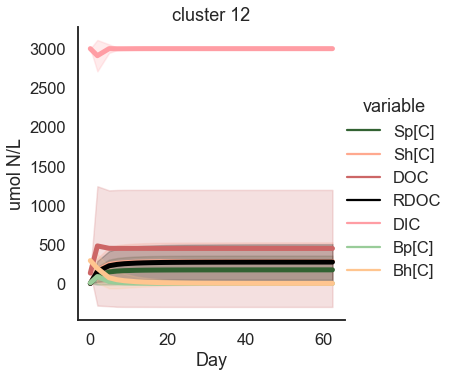

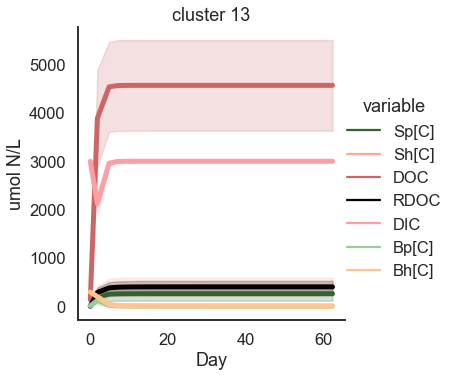

In [136]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    #ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=cccorder, palette=cccpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


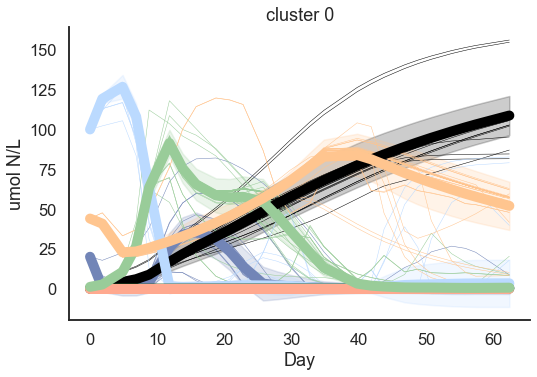

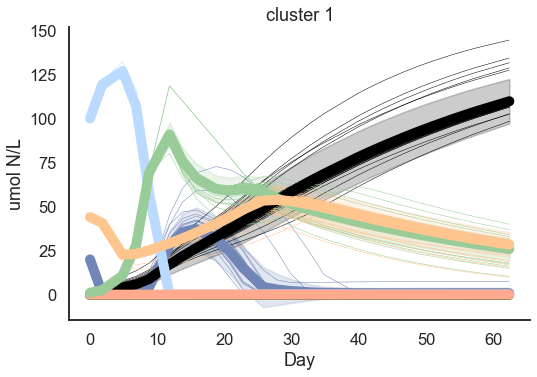

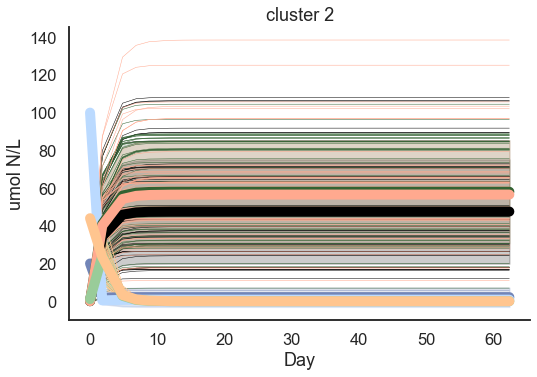

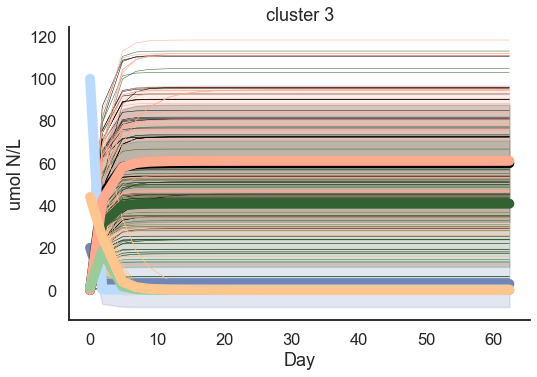

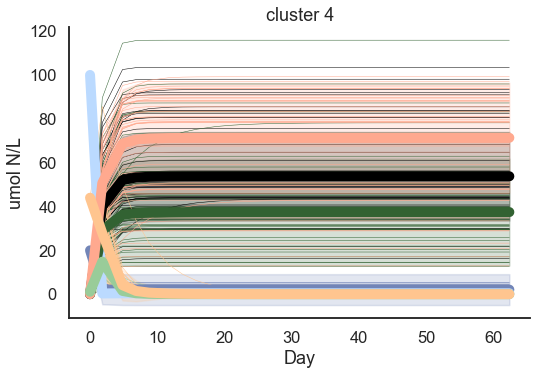

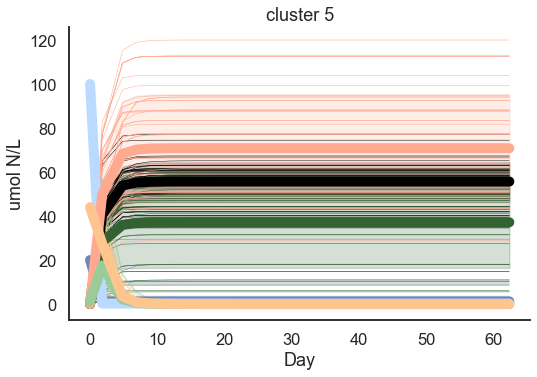

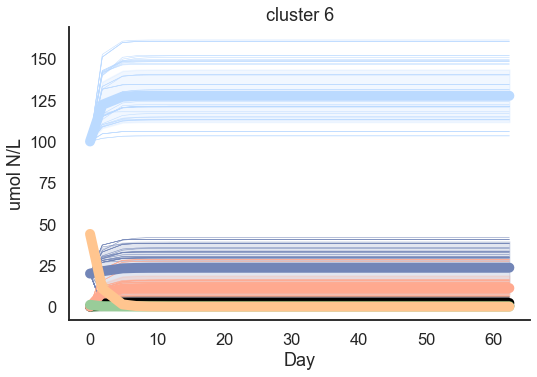

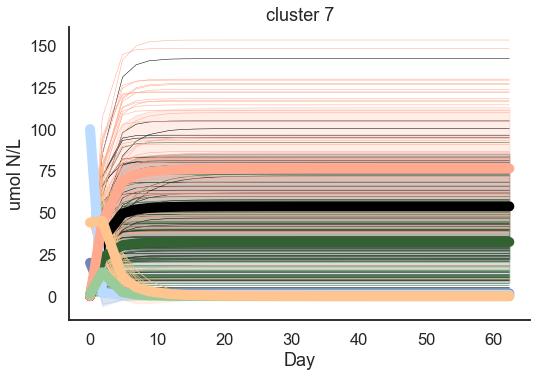

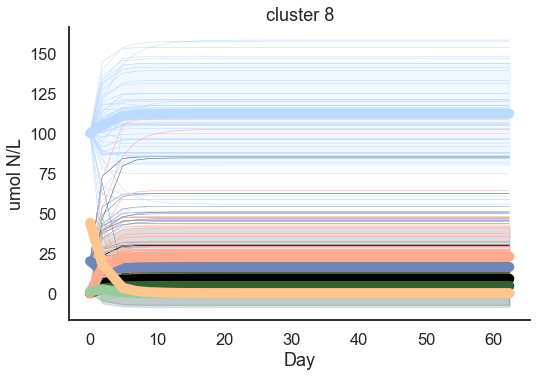

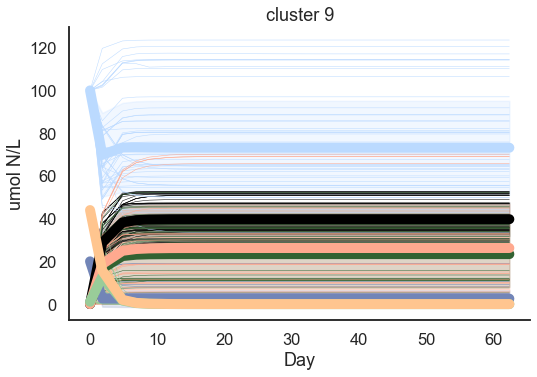

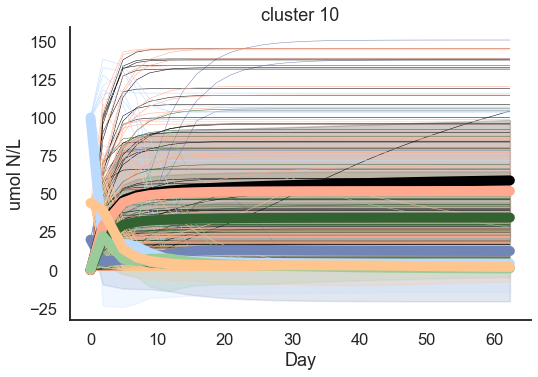

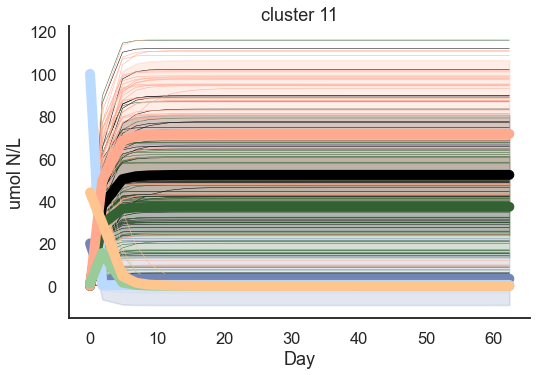

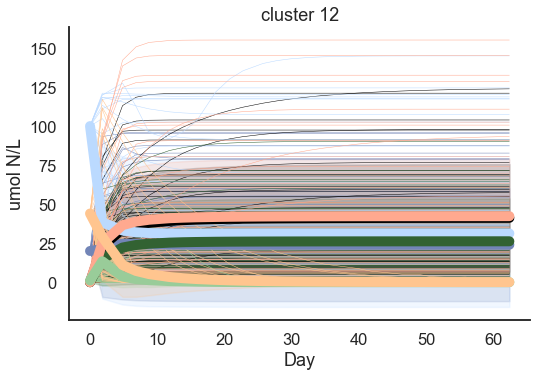

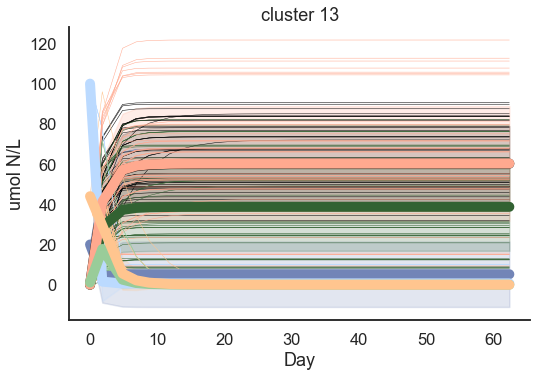

In [137]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


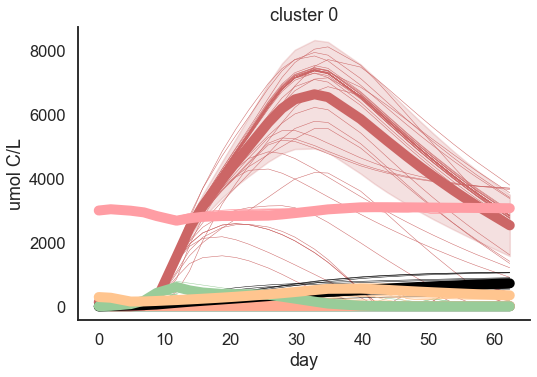

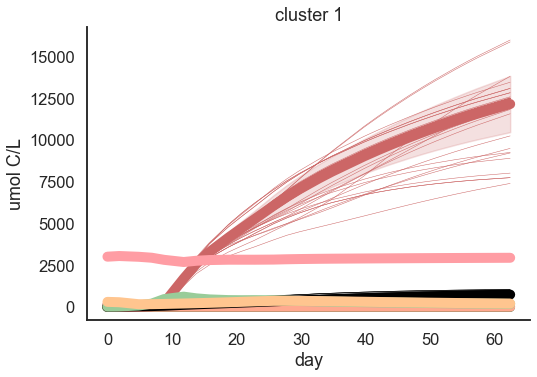

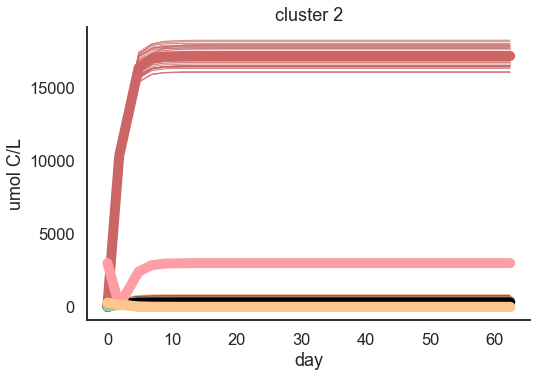

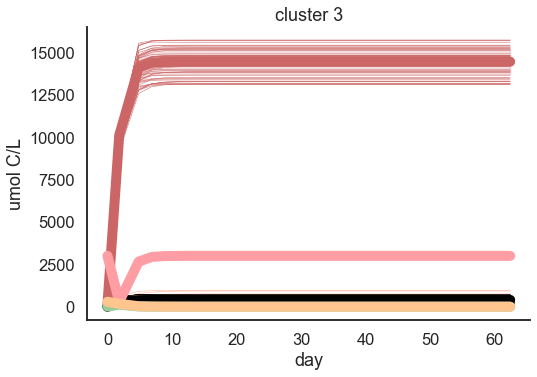

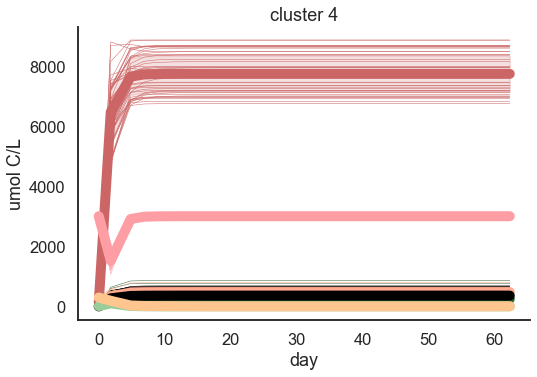

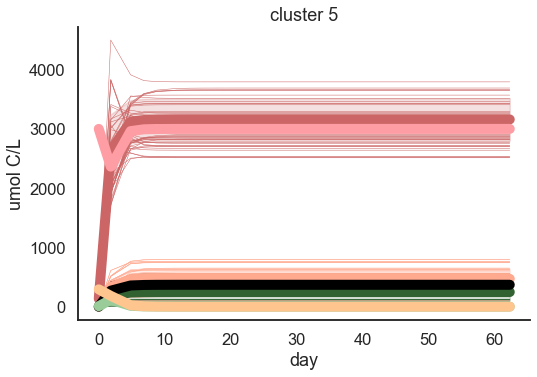

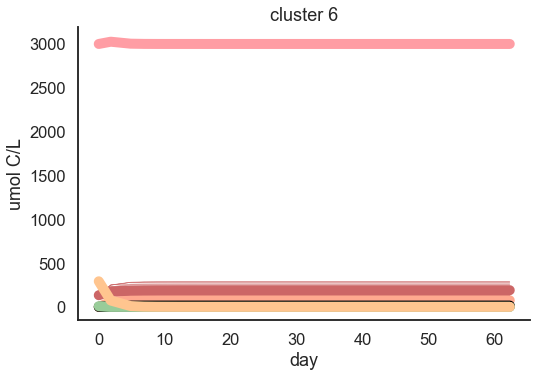

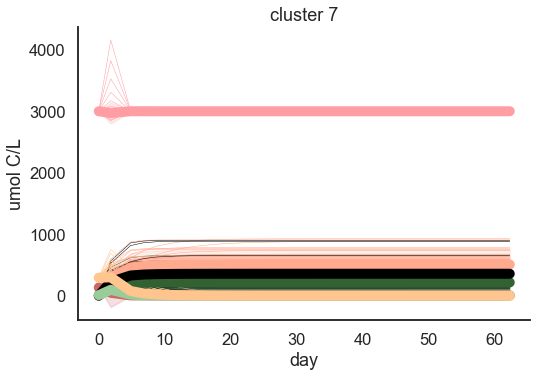

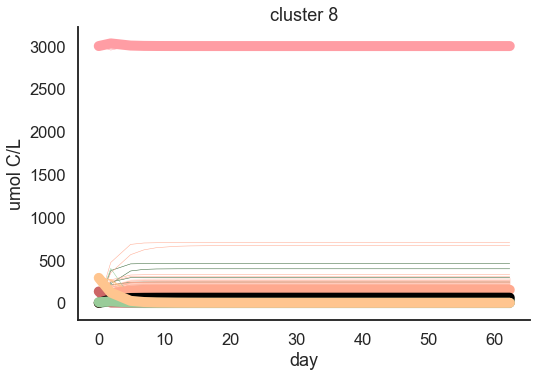

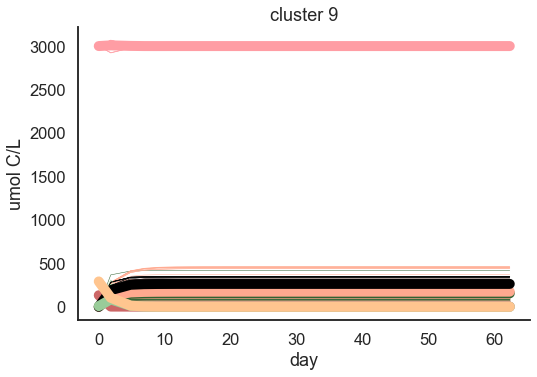

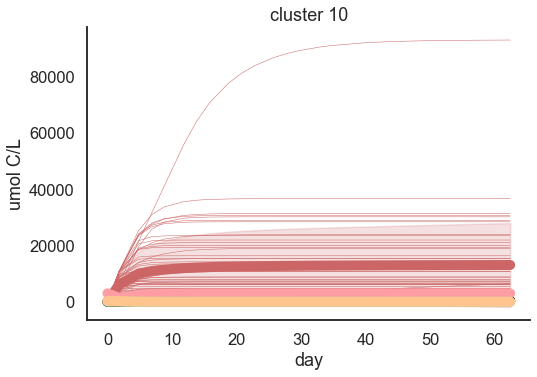

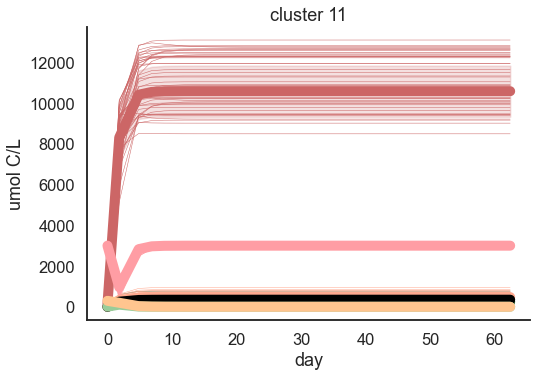

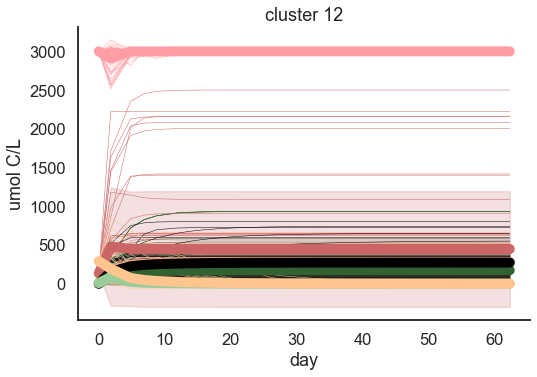

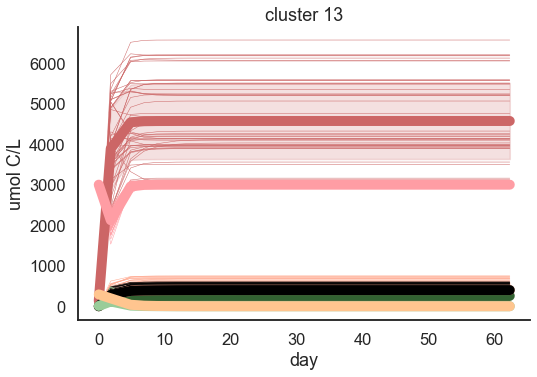

In [138]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)




for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10, ci='sd'
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [ ]:
udf.head()

In [ ]:
Xh.columns

In [ ]:
udf['Bp@42'] = udf['run_id'].map(Xh[('value', 'Bp', 42.0)])
udf['Bh@42'] = udf['run_id'].map(Xh[('value', 'Bh', 42.0)])


In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=3, kind='ecdf')

In [ ]:

mdf2 = pd.merge(mdf2, udf[['run_id', 'cluster', 'cluster2']], on='run_id', )

In [ ]:

sns.displot(data=mdf2.loc[mdf2.Day.round(0).isin(sample_days) & mdf2.variable.isin(['Bp', 'Bh'])], 
            x='value', col='Day', palette='Set2', row='variable',
            aspect=1,
            kind='ecdf', hue='cluster2'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=1,
            kind='ecdf', col='cluster'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='error', hue='cluster2', palette='fire', 
            aspect=3, kind='ecdf')

In [ ]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

In [ ]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

In [ ]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')

In [ ]:
sum_df2.to_csv('cluster_assignment.csv.gz')